In [1]:
import pandas as pd
import numpy as np

#for Label Encoding
from sklearn.preprocessing import LabelEncoder

#for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for Data splitting
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [2]:
daf = pd.read_csv(r'C:\Users\Acer\Desktop\Machine Learning Models\Dataset\URL_ExtractedFeatures.csv')
daf.shape

(11430, 51)

# Dataframe Splitting

In [3]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
def generate_accuracy_and_heatmap(model, x, y):
    confusion_m = confusion_matrix(y,model.predict(x))
    sns.heatmap(confusion_m,annot=True,fmt="d")
    ac="{:.2f}".format(accuracy_score(y,model.predict(x))*100)
    f_score = "{:.2f}".format(f1_score(y,model.predict(x))*100)
    print('Accuracy : ', ac,'%')
    print('F1 : ', f_score,'%')
    print("Y axis : Actual Value.")
    print("X axis : Predicted Value.")
    return 1

In [5]:
numerical_feature_columns = list(daf._get_numeric_data().columns)
numerical_feature_columns

['status_enc',
 'url_length',
 'url_dot',
 'url_slash',
 'url_hyphen',
 'url_at',
 'url_underline',
 'url_plus',
 'url_hashtag',
 'url_digits',
 'url_special',
 'url_percent',
 'url_equal',
 'url_and',
 'url_qm',
 'url_asterisk',
 'url_uppercase',
 'uppercase_ratio',
 'digits_ratio',
 'ascii_space',
 'domain_length',
 'subdomain_len',
 'domain_digits',
 'domain_scheme',
 'domain_dots',
 'domain_vowels',
 'pre_suf_fix',
 'tld_enc',
 'subdomain_enc',
 'port_enc',
 'dir_presence',
 'dir_heirarchy',
 'dir_slash',
 'dir_hyphen',
 'dir_digits',
 'dir_percentage',
 'filetype_length',
 'query_presence',
 'query_length',
 'query_hyphen',
 'query_equal',
 'query_at',
 'query_digits',
 'Qdigits_ratio',
 'filetype_enc',
 'short_url',
 'redirection',
 'url_email',
 'url_validation',
 'ip_class',
 'domain_age']

In [6]:
target = 'status_enc'

<AxesSubplot:>

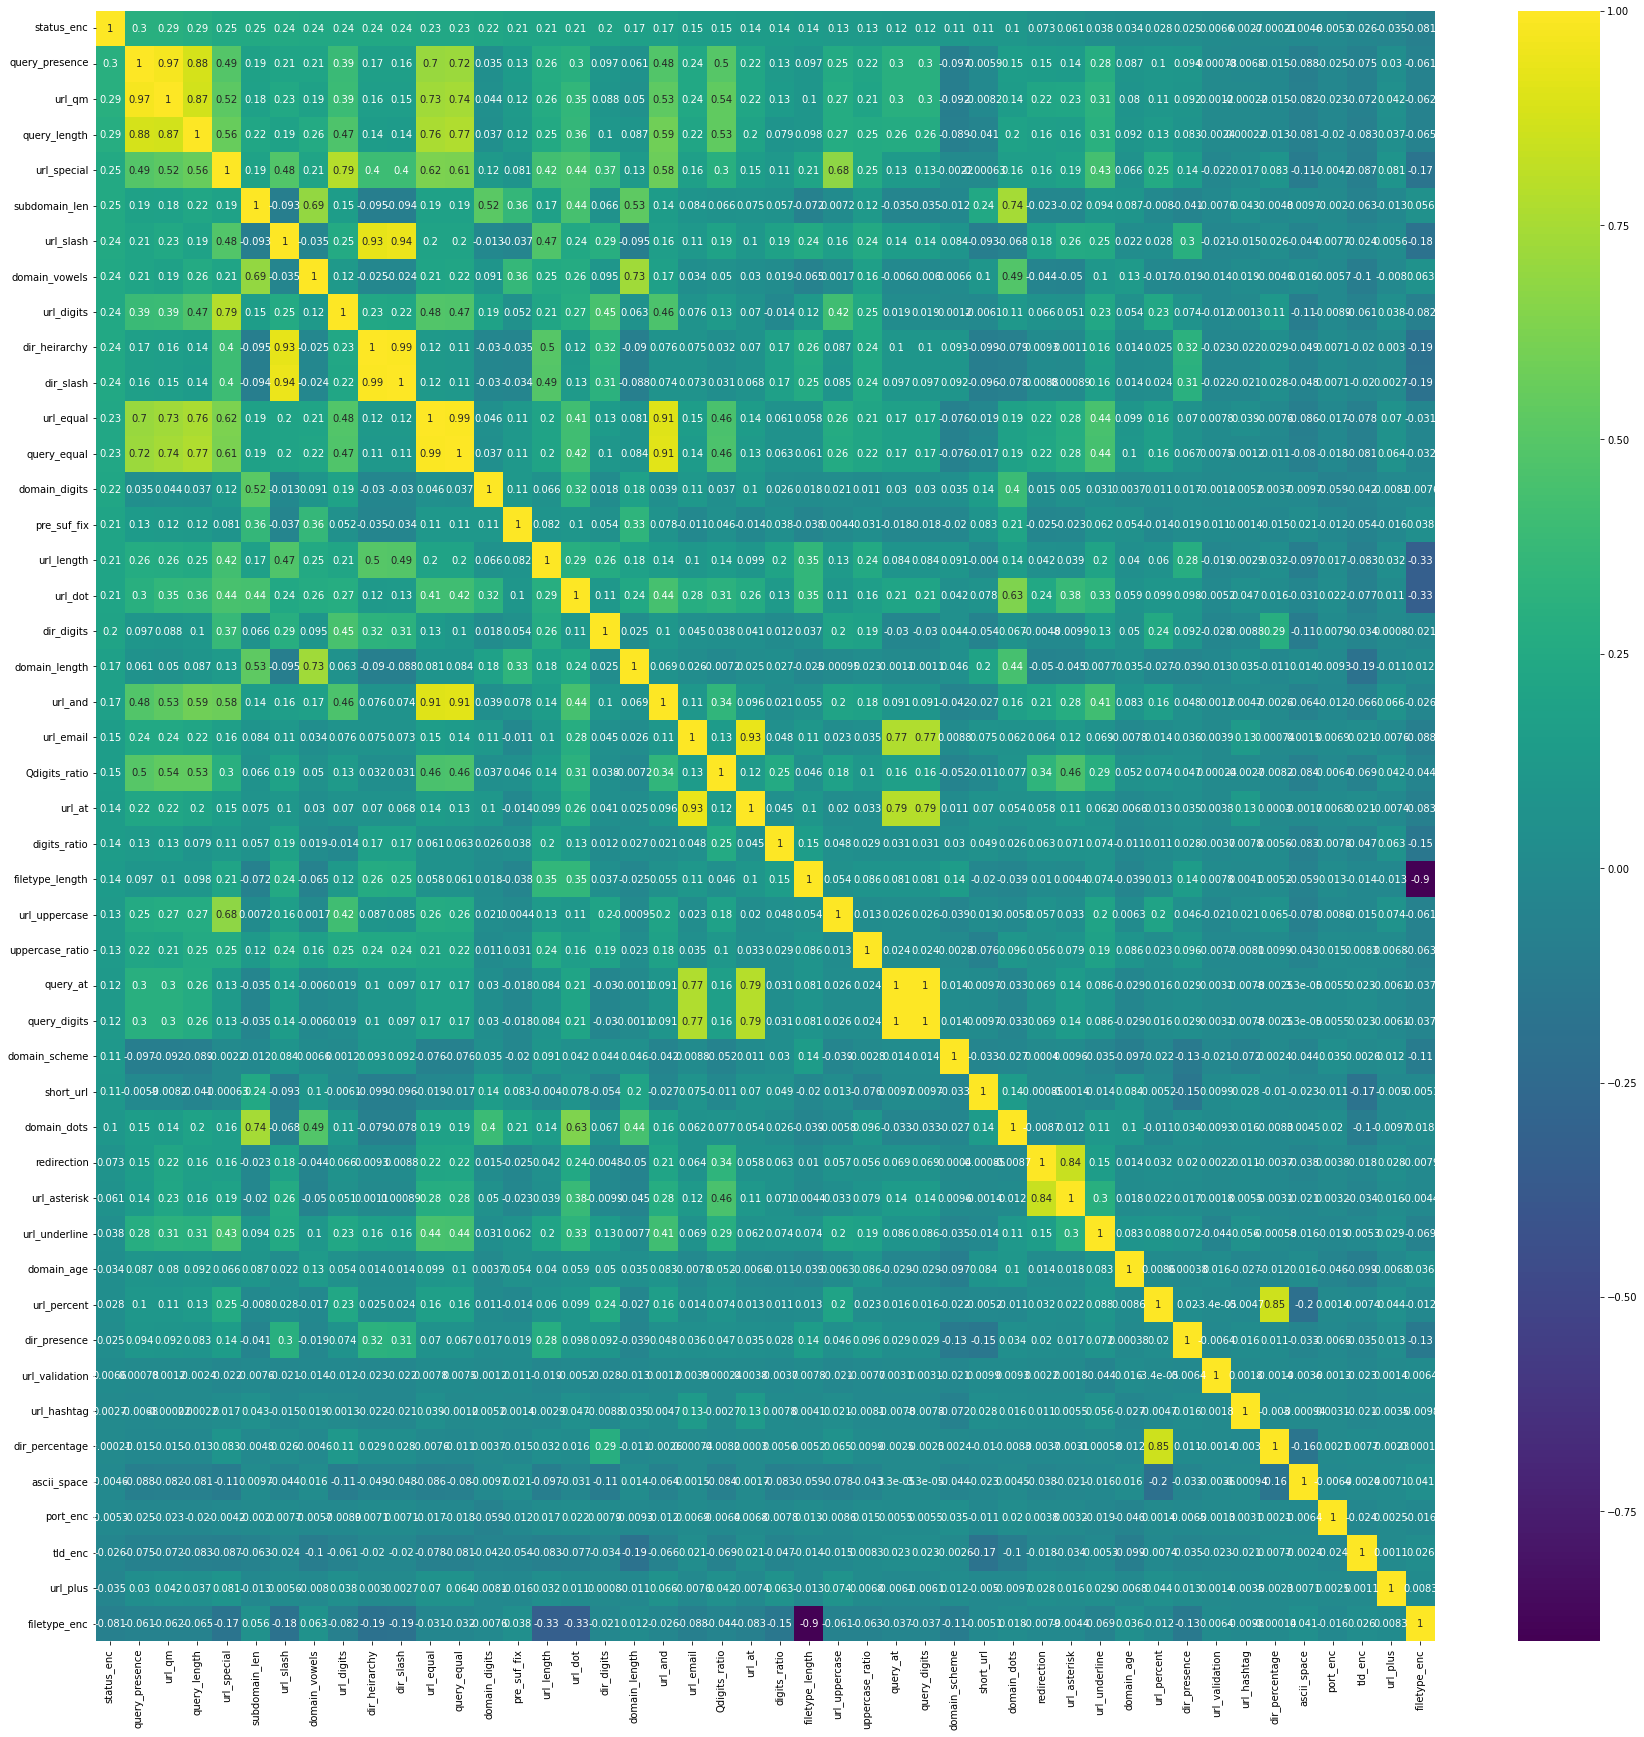

In [7]:
k = 46 #number of variables for heatmap
cols = daf[numerical_feature_columns].corr().nlargest(k, target)[target].index
cm = daf[cols].corr()
plt.figure(figsize=(30,30))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [8]:
X = daf.loc[:, daf.columns != target]
Y = daf.loc[:, daf.columns == target]

In [9]:
X.shape

(11430, 50)

In [10]:
Y.shape

(11430, 1)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0 , shuffle = False)

In [12]:
X_train.shape

(9144, 50)

In [13]:
Y_test['status_enc'].value_counts()

0    1176
1    1110
Name: status_enc, dtype: int64

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

classifier = DecisionTreeClassifier(random_state=0 , max_depth=18)

classifier.fit(X_train, Y_train)

Y_predict = classifier.predict(X_test)

Accuracy :  86.44 %
F1 :  85.71 %
Y axis : Actual Value.
X axis : Predicted Value.


1

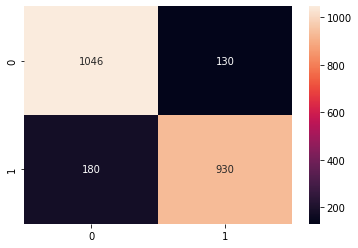

In [15]:
# clf = classifier.fit(X_train, Y_train)
# tree.plot_tree(clf)
generate_accuracy_and_heatmap(classifier, X_test, Y_test)

# FEATURE SELECTION

In [16]:
select_feature = SelectKBest(chi2, k=50).fit(X_train, Y_train)

In [17]:
selected_features_df = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
27,subdomain_enc,836217.203403
9,url_special,27824.224596
8,url_digits,25272.287479
15,url_uppercase,11007.324153
20,subdomain_len,8934.911318
16,uppercase_ratio,7338.711061
33,dir_digits,6428.043337
17,digits_ratio,4772.109964
21,domain_digits,4611.476816
42,Qdigits_ratio,3171.001582


In [18]:
X_train_chi = select_feature.transform(X_train)
X_test_chi = select_feature.transform(X_test)

In [19]:
X_train.head(3)

,url_length,url_dot,url_slash,url_hyphen,url_at,url_underline,url_plus,url_hashtag,url_digits,url_special,...,query_at,query_digits,Qdigits_ratio,filetype_enc,short_url,redirection,url_email,url_validation,ip_class,domain_age
0,0,3,3,0,0,0,0,0,0,37,...,0,0,0,54,0,0,0,1,1,3
1,1,1,5,0,0,0,0,0,17,77,...,0,0,0,76,0,0,0,1,1,3
2,1,4,5,1,0,2,0,0,19,126,...,0,0,4,76,0,0,0,1,0,3


In [20]:
X_train_chi

array([[0, 3, 3, ..., 1, 1, 3],
       [1, 1, 5, ..., 1, 1, 3],
       [1, 4, 5, ..., 1, 0, 3],
       ...,
       [0, 2, 3, ..., 1, 1, 0],
       [1, 3, 5, ..., 1, 3, 3],
       [0, 2, 3, ..., 1, 1, 0]], dtype=int64)

<AxesSubplot:>

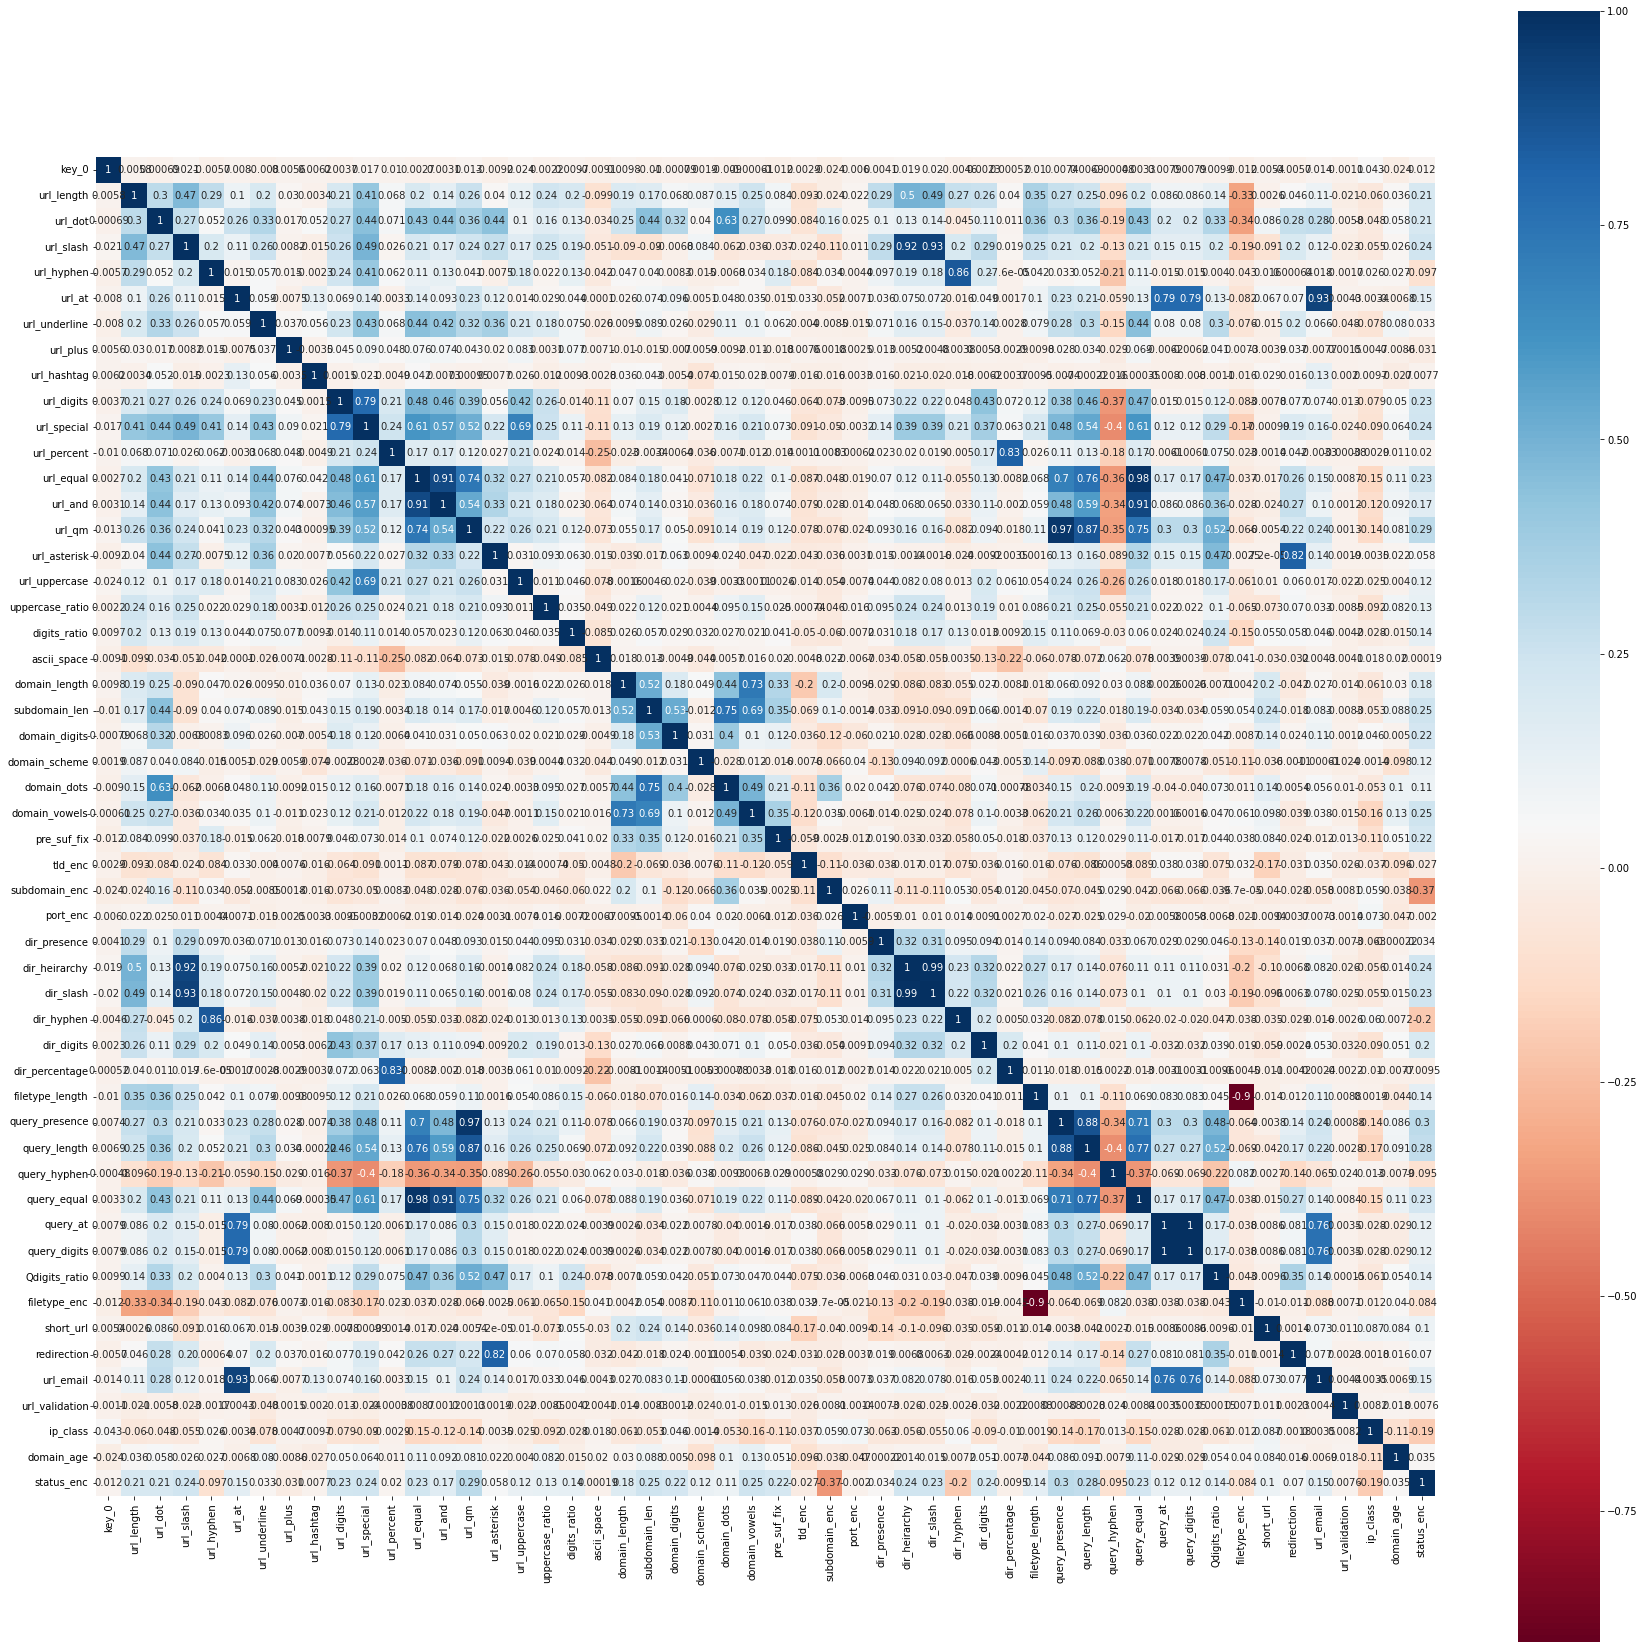

In [21]:
colormap = plt.cm.RdBu
plt.figure(figsize=(30,30))
plt.title('', y=2, size=20)
sns.heatmap(X_train.merge(Y_train , on = X_train.index ).corr(), 
            square=True, cmap=colormap, linecolor='white', annot=True)

# Model Training

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

## Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
# clf_DT=DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_depth=18,
#                                      max_features=11, max_leaf_nodes=None,
#                                      min_impurity_decrease=0.0,
#                                      min_samples_leaf=1, min_samples_split=2,
#                                      min_weight_fraction_leaf=0.0, 
#                                      random_state=2, splitter='best')
clf_DT=DecisionTreeClassifier(random_state=0 , max_depth=18)
clf_DT.fit(X_train_chi, Y_train)

DecisionTreeClassifier(max_depth=18, random_state=0)

In [24]:
# clf = classifier.fit(X_train, Y_train)
# tree.plot_tree(clf)

Accuracy :  86.44 %
F1 :  85.71 %
Y axis : Actual Value.
X axis : Predicted Value.


1

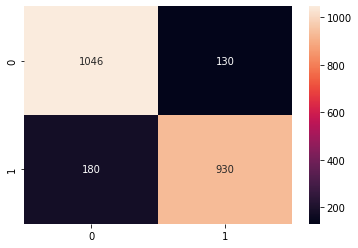

In [25]:
generate_accuracy_and_heatmap(clf_DT, X_test_chi, Y_test)

In [26]:
# # # with gridsearchCV
# tree_param = [{'criterion': ['entropy', 'gini'],'splitter' : ['best', 'random'],'min_samples_split':list(range(0,10)),'max_depth' : [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 'max_features': list(range(0,14))}]
# # tree_param = [{, 'max_leaf_nodes' :list(range(0,10))}]
# clf_DT=DecisionTreeClassifier()
# gs_DT=GridSearchCV(clf_DT, tree_param, cv = 3, scoring='accuracy')
# gs_DT.fit(X_train_chi, Y_train)

In [27]:
# print(gs_DT.best_params_)

In [28]:
# generate_accuracy_and_heatmap(gs_DT, X_test_chi, Y_test)

## Support Vector Machine

In [29]:
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train_chi, Y_train)

SVC()

Accuracy :  71.83 %
F1 :  72.19 %
Y axis : Actual Value.
X axis : Predicted Value.


1

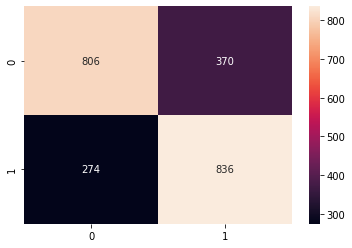

In [30]:
generate_accuracy_and_heatmap(clf_svm, X_test_chi, Y_test)

## Nu-Support Vector Classification.

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC
clf_nsvc = make_pipeline(StandardScaler(), NuSVC())
clf_nsvc.fit(X_train_chi, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('nusvc', NuSVC())])

Accuracy :  82.90 %
F1 :  82.32 %
Y axis : Actual Value.
X axis : Predicted Value.


1

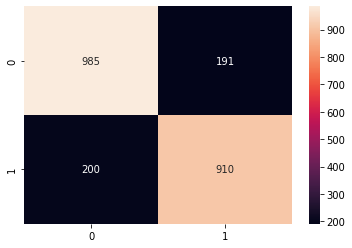

In [32]:
generate_accuracy_and_heatmap(clf_nsvc, X_test_chi, Y_test)

## Stochastic Gradient Descent

In [33]:
from sklearn.linear_model import SGDClassifier
clf_sgd = SGDClassifier()
clf_sgd.fit(X_train_chi, Y_train)

SGDClassifier()

Accuracy :  78.57 %
F1 :  78.99 %
Y axis : Actual Value.
X axis : Predicted Value.


1

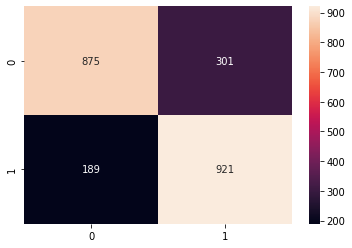

In [34]:
generate_accuracy_and_heatmap(clf_sgd, X_test_chi, Y_test)

## Gaussian Process Classification

In [35]:
from sklearn.gaussian_process import GaussianProcessClassifier

clf_gpc = GaussianProcessClassifier()
clf_gpc.fit(X_train_chi, Y_train)

GaussianProcessClassifier()

Accuracy :  81.19 %
F1 :  79.11 %
Y axis : Actual Value.
X axis : Predicted Value.


1

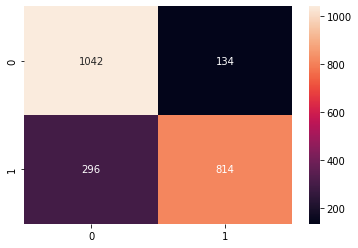

In [36]:
generate_accuracy_and_heatmap(clf_gpc, X_test_chi, Y_test)

## Multi-layer Perceptron

In [37]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier()

clf_mlp.fit(X_train_chi, Y_train)

MLPClassifier()

Accuracy :  76.29 %
F1 :  79.59 %
Y axis : Actual Value.
X axis : Predicted Value.


1

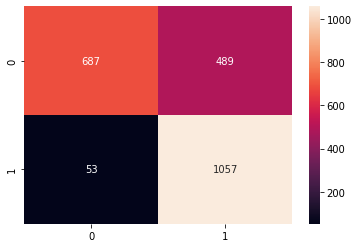

In [38]:
generate_accuracy_and_heatmap(clf_mlp, X_test_chi, Y_test)

## Adaboost

In [39]:
from sklearn.ensemble import AdaBoostClassifier

clf_adaboost = AdaBoostClassifier()

clf_adaboost.fit(X_train_chi, Y_train)

AdaBoostClassifier()

Accuracy :  84.69 %
F1 :  83.96 %
Y axis : Actual Value.
X axis : Predicted Value.


1

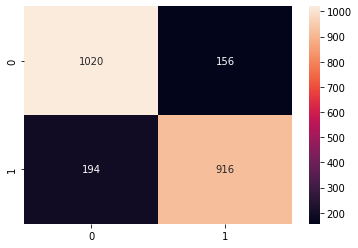

In [40]:
generate_accuracy_and_heatmap(clf_adaboost, X_test_chi, Y_test)

## Xgboost

[19:35:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy :  91.86 %
F1 :  91.58 %
Y axis : Actual Value.
X axis : Predicted Value.


1

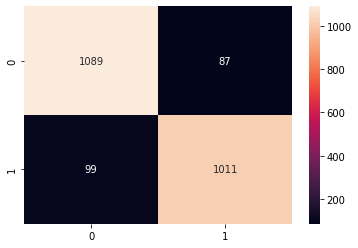

In [41]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(max_depth=9, learning_rate=0.300000012, gamma=0, base_score=0.5, reg_alpha=0.4, reg_lambda=0.5, 
                            n_estimators=195)

xgb_clf.fit(X_train_chi, Y_train)
generate_accuracy_and_heatmap(xgb_clf, X_test_chi, Y_test)

In [42]:
# base_score=0.5, booster='gbtree', colsample_bylevel=1,
# colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
# gamma=0, gpu_id=-1, importance_type=None,
# interaction_constraints='', learning_rate=0.300000012,
# max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
# monotone_constraints='()', n_estimators=100, n_jobs=8,
# num_parallel_tree=1, predictor='auto', random_state=0,
# reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
# tree_method='exact', validate_parameters=1, verbosity=None

Accuracy :  91.86 %
F1 :  91.58 %
Y axis : Actual Value.
X axis : Predicted Value.


1

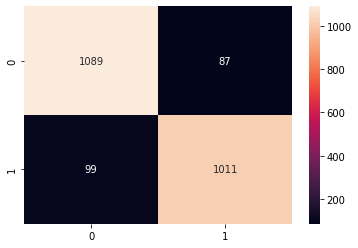

In [43]:
generate_accuracy_and_heatmap(xgb_clf, X_test_chi, Y_test)

## KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=5)
 
clf_knn.fit(X_train_chi, Y_train)

KNeighborsClassifier()

Accuracy :  83.73 %
F1 :  82.67 %
Y axis : Actual Value.
X axis : Predicted Value.


1

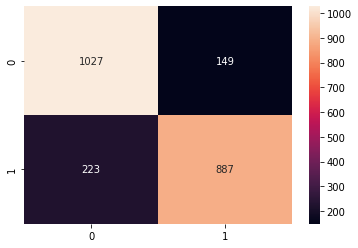

In [45]:
generate_accuracy_and_heatmap(clf_knn, X_test_chi, Y_test)

## Random Forest

Accuracy :  88.06 %
F1 :  87.65 %
Y axis : Actual Value.
X axis : Predicted Value.


1

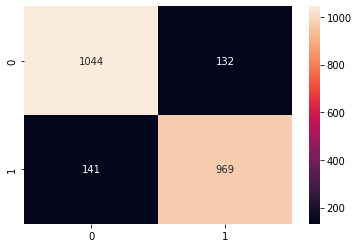

In [46]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(criterion='entropy', max_depth= 9, max_features= 'sqrt', n_estimators= 200)

clf_rf.fit(X_train_chi, Y_train)
generate_accuracy_and_heatmap(clf_rf, X_test_chi, Y_test)

In [47]:
# generate_accuracy_and_heatmap(clf_rf, X_test_chi, Y_test)

In [48]:
# # # with gridsearchCV1
# rfc = RandomForestClassifier() 

# param_grid = { 
#     'n_estimators': [150,200,250],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'criterion':['entropy', 'gini']
# }

# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train_chi, Y_train)

In [49]:
# print(CV_rfc.best_params_)

In [50]:
# generate_accuracy_and_heatmap(CV_rfc, X_test_chi, Y_test)

## LightGBM

In [51]:
import lightgbm as lgb
clf_lgbm = lgb.LGBMClassifier(max_depth=18, learning_rate=0.300000012, gamma=0, base_score=0.5, reg_alpha=0.4, reg_lambda=0.5,
                            n_estimators=195)
clf_lgbm.fit(X_train_chi, Y_train)

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: base_score


LGBMClassifier(base_score=0.5, gamma=0, learning_rate=0.300000012, max_depth=18,
               n_estimators=195, reg_alpha=0.4, reg_lambda=0.5)

Accuracy :  91.60 %
F1 :  91.34 %
Y axis : Actual Value.
X axis : Predicted Value.


1

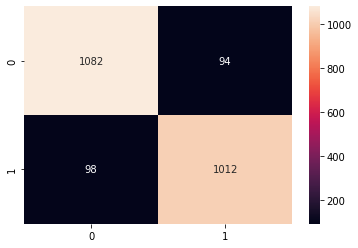

In [52]:
generate_accuracy_and_heatmap(clf_lgbm, X_test_chi, Y_test)

## Gaussian Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_train_chi, Y_train)

GaussianNB()

Accuracy :  70.73 %
F1 :  60.01 %
Y axis : Actual Value.
X axis : Predicted Value.


1

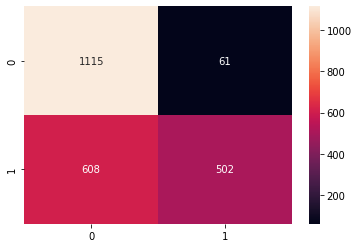

In [54]:
generate_accuracy_and_heatmap(clf_gnb, X_test_chi, Y_test)

## Multinomial Naive Bayes

In [55]:
from sklearn.naive_bayes import MultinomialNB
clf_mnb = MultinomialNB()
clf_mnb.fit(X_train_chi, Y_train)

MultinomialNB()

Accuracy :  70.82 %
F1 :  68.99 %
Y axis : Actual Value.
X axis : Predicted Value.


1

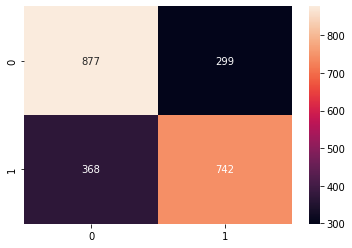

In [56]:
generate_accuracy_and_heatmap(clf_mnb, X_test_chi, Y_test)

## Complement Naive Bayes

In [57]:
from sklearn.naive_bayes import ComplementNB
clf_cnb = ComplementNB()
clf_cnb.fit(X_train_chi, Y_train)

ComplementNB()

Accuracy :  70.82 %
F1 :  68.99 %
Y axis : Actual Value.
X axis : Predicted Value.


1

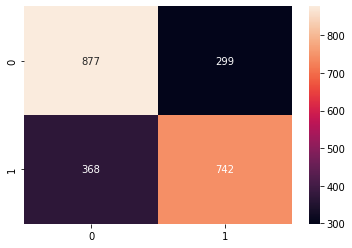

In [58]:
generate_accuracy_and_heatmap(clf_cnb, X_test_chi, Y_test)